In [18]:
import pandas as pd
import numpy as np
#data = pd.read_csv('data/Compressed Mortality, 2016.txt', sep=" ", header=None)
#data.columns = ["a", "b", "c", "etc."]
#data = pd.read_fwf('data/Compressed Mortality, 2016.txt')


from os import listdir
from os.path import isfile, join

import matplotlib.pyplot as plt
% matplotlib inline

import glob
import os
import math

from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import feature_selection
from sklearn import preprocessing



In [19]:
# Compressed Mortality

# get a list of the data files the direction
onlyfiles = [f for f in listdir('data/Compressed Mortality/') if isfile(join('data/Compressed Mortality/', f))]
print(onlyfiles)

# for each txt file...
for i in np.arange(len(onlyfiles)):

    data_temp = pd.read_table('data/Compressed Mortality/' + onlyfiles[i], header='infer', index_col=None,  names=('Notes', 'County', 'County Code', 'Deaths', 'Population', 'Crude Rate'))
    #data_temp.drop(data_temp.index[0])
    data_dropped = data_temp.iloc[1:] #Remove the first row because it's the files's header
    data_dropped['County Code'] = pd.to_numeric(data_dropped['County Code']) # Make the zipcode a float instead of a string
    #print(data_dropped.head(5))

    data_dropped.insert(0, 'year', int(onlyfiles[i][-8:-4])) # Add the year as a column
#print(data.head)
    if i == 0:
        data = data_dropped
    else:
        data = pd.concat([data, data_dropped]) # add each year's text file to the overall dataframe


data_sorted = data.sort_values(by=['County Code', 'year']) # put in order

#print(data_sorted.head(5))

data_mortality = data_sorted


data_mortality.set_index(['County Code', 'year'], inplace=True, drop =False)


temp = np.zeros((data_mortality.shape[0],1))
unreliable = np.zeros((data_mortality.shape[0],1))
for i in range(data_mortality.shape[0]):
    
    
    #print(data['Crude Rate'].iloc[i])
    #s = re.findall('\d*\.?\d+', data['Crude Rate'].iloc[i])
    try:
        temp[i] = float(data_mortality['Crude Rate'].iloc[i].split()[0])
        unreliable[i] = 1
    except:
        temp[i] = float(data_mortality['Crude Rate'].iloc[i])
        unreliable[i] = 0
        
data_mortality['Crude Rate'] =temp


['Compressed Mortality, 1999.txt', 'Compressed Mortality, 2000.txt', 'Compressed Mortality, 2001.txt', 'Compressed Mortality, 2002.txt', 'Compressed Mortality, 2003.txt', 'Compressed Mortality, 2004.txt', 'Compressed Mortality, 2005.txt', 'Compressed Mortality, 2006.txt', 'Compressed Mortality, 2007.txt', 'Compressed Mortality, 2008.txt', 'Compressed Mortality, 2009.txt', 'Compressed Mortality, 2010.txt', 'Compressed Mortality, 2011.txt', 'Compressed Mortality, 2012.txt', 'Compressed Mortality, 2013.txt', 'Compressed Mortality, 2014.txt', 'Compressed Mortality, 2015.txt', 'Compressed Mortality, 2016.txt']


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [20]:
# perscrption drugs

# Get all the relevant csv files
onlyfiles = [f for f in listdir('data/Prescriptions/') if isfile(join('data/Prescriptions/', f))]

print(onlyfiles)

# For all the files...
for i in np.arange(len(onlyfiles)):
    # load the CSV
    data_temp = pd.read_csv('data/Prescriptions/' + onlyfiles[i], index_col=None,  names=('State', 'County Code', 'Opioid Perscription Rate'))
    
    # Insert the year as a column in the dataframe
    data_temp.insert(0, 'year', int(onlyfiles[i][-8:-4]))
#print(data.head)
    if i == 0:
        data = data_temp
    else:
        data = pd.concat([data, data_temp]) # Add to the overall dataframe


data_sorted = data.sort_values(by=['County Code', 'year'])


data_perscriptions = data_sorted

data_perscriptions.set_index(['County Code', 'year'], inplace=True, drop =False)

['rxrate_2006.csv', 'rxrate_2007.csv', 'rxrate_2008.csv', 'rxrate_2009.csv', 'rxrate_2010.csv', 'rxrate_2011.csv', 'rxrate_2012.csv', 'rxrate_2013.csv', 'rxrate_2014.csv', 'rxrate_2015.csv', 'rxrate_2016.csv']


In [21]:
# county health statistics

def create_fips_code(df):
    fips_code = []
    for i in range(df['statecode'].shape[0]):
        # combine the statecode and countycode to create the fips_code
        string = '{:d}{:03d}'.format(df['statecode'].iloc[i], df['countycode'].iloc[i])
        fips_code.append(int(string)) 
    return fips_code

# load all data into a single dataframe
data_dir = 'data/county health rankings'
file_wildcard = os.path.join(data_dir, '*.csv')
for i, filepath in enumerate(reversed(glob.glob(file_wildcard))):
    year = filepath.split('/')[-1].split('\\')[-1].split(' ')[0]
    print(i, filepath, year)
    
    # load the data
    data = pd.read_csv(filepath)
    # convert all columns to lower case
    data.columns = map(str.lower, data.columns)
    # calculate the fips_code and insert as 1st column
    data.insert(loc=0, column='County Code', value=create_fips_code(data))
    # insert the year as the 2nd column
    data.insert(loc=1, column='year', value=int(year))
    #
    if i == 0:
        df = data
        orig_columns = data.columns
    else:
        df = pd.concat([df, data])
    print(data.shape)
    
print(df.shape)

data_health_statistics = df
#data_health_statistics.rename(columns = {'5-digit fips code':'County Code'}, inplace = True)


data_health_statistics = data_health_statistics.sort_values(by=['County Code', 'year'])

data_health_statistics.set_index(['County Code', 'year'], inplace=True, drop =False)

0 data/county health rankings\2017 CHR analytic data.csv 2017
(3186, 358)
1 data/county health rankings\2016 CHR analytic data.csv 2016
(3191, 356)
2 data/county health rankings\2015 CHR analytic data.csv 2015
(3191, 331)
3 data/county health rankings\2014 CHR analytic data.csv 2014
(3191, 326)
(12759, 373)


In [22]:
# census

def create_fips_code(df):
    fips_code = []
    for i in range(df['state fips code'].shape[0]):
        # combine the statecode and countycode to create the fips_code
        string = '{:d}{:03d}'.format(df['state fips code'].iloc[i], df['county fips code'].iloc[i])
        fips_code.append(int(string)) 
    return fips_code

# load the data
data_2016 = pd.read_csv('data/census/2016_census.csv', encoding='utf-8')
data_2015 = pd.read_csv('data/census/2015_census.csv', encoding='utf-8')
print(data_2016.shape)
print(data_2015.shape)
# convert all columns to lower case
data_2016.columns = map(str.lower, data_2016.columns)
data_2015.columns = map(str.lower, data_2015.columns)
# calculate the fips_code and insert as 1st column
data_2016.insert(loc=0, column='County Code', value=create_fips_code(data_2016))
data_2015.insert(loc=0, column='County Code', value=create_fips_code(data_2015))
# insert the year as the 2nd column
data_2016.insert(loc=1, column='year', value=int(2016))
data_2015.insert(loc=1, column='year', value=int(2015))

def replace_substring_in_list(str_list, target_substring, replace_substring):
    new_list = []
    for s in str_list:
        if target_substring in s:
            s = s.replace(target_substring, replace_substring)
        new_list.append(s)
    return new_list

# resolve like-column name mismatches
data_2016.columns = replace_substring_in_list(data_2016.columns, '2016 ', '')
data_2016.columns = replace_substring_in_list(data_2016.columns, 'all people!!', '')
data_2016.columns = replace_substring_in_list(data_2016.columns, 'poverty level!!18 years and over!!', 'poverty level!!')

data_2015.columns = replace_substring_in_list(data_2015.columns, '2015 ', '')
data_2015.columns = replace_substring_in_list(data_2015.columns, 'poverty level!!65 years and over!!', 'poverty level!!')

# concatenate data into a single dataframe
data_census = pd.concat([data_2016, data_2015])
data_census.set_index(['County Code', 'year'], inplace=True, drop=False)

(3220, 1342)
(3220, 1342)


In [23]:
# combine the three dataframes
# combine all the data
data = data_mortality.join(data_perscriptions, how='outer', 
                           lsuffix='_data_mortality', rsuffix='_data_perscriptions')
data = data.join(data_health_statistics, how='outer', 
                 lsuffix='', rsuffix='_data_health_statistics')
data = data.join(data_census, how='outer',
                 lsuffix='', rsuffix='_data_census')

data = data.drop('year', axis=1)
#data = data.reset_index(level=['year'])


data['year_keep'] = data.index.get_level_values('year')
# add year as a variable
# data is all three dataframes with nothing removed


In [24]:
#plt.figure()
#plt.scatter(data['Opioid Perscription Rate'], data['Crude Rate'])


In [25]:
# remove rows with no response variable

print(data.shape)

null_dataframe = data.isnull()
data = data.drop(data[null_dataframe["Crude Rate"]].index, inplace=False)

#reduced_data = data.drop(data[(data['Crude Rate'] == 'nan').values].index, inplace=False)

print(data.shape)




(41162, 1730)
(11798, 1730)


In [26]:



#print(data.shape)##

#null_dataframe = data.isnull()
#reduced_data = data.drop(data[null_dataframe['drug overdose deaths value']].index, inplace=False)

#reduced_data = data.drop(data[(data['Crude Rate'] == 'nan').values].index, inplace=False)

#print(reduced_data.shape)





In [27]:
print(list(data_census.columns.values))
#remove useless features

to_remove = ['canonical name for geography','countycode', 'statecode', 'county that was not ranked', 'drug overdose deaths: modeled upper confidence interval', 'county', 'state', 'drug overdose deaths value', 'Notes','County','County Code_data_mortality','Deaths','Population','State','County Code_data_perscriptions','5-digit fips code','County Code','drug overdose deaths lower confidence interval','drug overdose deaths numerator','drug overdose deaths upper confidence interval','drug overdose deaths: modeled denominator','drug overdose deaths: modeled lower confidence interval','drug overdose deaths: modeled value']

for i in np.arange(len(to_remove)):
    data.drop(to_remove[i], axis=1, inplace = True)


['County Code', 'canonical name for geography', 'county', 'county fips code', 'estimate!!ancestry!!total population', 'estimate!!ancestry!!total population!!american', 'estimate!!ancestry!!total population!!american.1', 'estimate!!ancestry!!total population!!arab', 'estimate!!ancestry!!total population!!arab.1', 'estimate!!ancestry!!total population!!czech', 'estimate!!ancestry!!total population!!czech.1', 'estimate!!ancestry!!total population!!danish', 'estimate!!ancestry!!total population!!danish.1', 'estimate!!ancestry!!total population!!dutch', 'estimate!!ancestry!!total population!!dutch.1', 'estimate!!ancestry!!total population!!english', 'estimate!!ancestry!!total population!!english.1', 'estimate!!ancestry!!total population!!french (except basque)', 'estimate!!ancestry!!total population!!french (except basque).1', 'estimate!!ancestry!!total population!!french canadian', 'estimate!!ancestry!!total population!!french canadian.1', 'estimate!!ancestry!!total population!!german', 'e

In [28]:
feature_names = data.columns.values

print(data.shape)
for i in np.arange(len(feature_names)):
    if feature_names[i].find('denominator') != -1:
        data.drop(feature_names[i], axis=1, inplace = True)
    if feature_names[i].find('numerator') != -1:
        data.drop(feature_names[i], axis=1, inplace = True)
    if feature_names[i].find('confidence') != -1:
        data.drop(feature_names[i], axis=1, inplace = True)

print(data.shape)

feature_names = data.columns.values

print(data.shape)
for i in np.arange(len(feature_names)):
    if feature_names[i].find('estimate') != -1:
        data.drop(feature_names[i], axis=1, inplace = True)
        
print(data.shape)


(11798, 1707)
(11798, 1425)
(11798, 1425)
(11798, 755)


In [32]:
print(data.columns.values)

['year_data_mortality' 'Crude Rate' 'year_data_perscriptions'
 'Opioid Perscription Rate' 'access to exercise opportunities value'
 'adult obesity value' 'adult smoking value'
 'air pollution - particulate matter value'
 'alcohol-impaired driving deaths value' 'child mortality value'
 'children eligible for free lunch value' 'children in poverty value'
 'children in single-parent households value'
 'could not see doctor due to cost value' 'dentists ratio' 'dentists value'
 'diabetes value' 'diabetic screening value' 'disconnected youth value'
 'drinking water violations value' 'driving alone to work value'
 'excessive drinking value' 'firearm fatalities value'
 'food environment index value' 'food insecurity value'
 'frequent mental distress value' 'frequent physical distress value'
 'health care costs value' 'high school graduation value'
 'hiv prevalence rate value' 'homicide rate value'
 'inadequate social support value' 'income inequality value'
 'infant mortality value' 'injury de

In [33]:

# Make the weird entires in the this features more normal
drinking_water = data['drinking water violations value'].values
drinking_water[drinking_water == 'Yes'] = 1.0
drinking_water[drinking_water == 'No'] = 0.0
drinking_water[drinking_water == '.'] = 0.0

data['drinking water violations value'] = pd.to_numeric(data['drinking water violations value'])



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


In [34]:
# change ratios like 1:2000 into a decimal in a few variables
data.select_dtypes(include=['O'])

dentists ratio mental health providers ratio  \
County Code year                                                
1003        1999            NaN                           NaN   
            2000            NaN                           NaN   
            2001            NaN                           NaN   
            2002            NaN                           NaN   
            2003            NaN                           NaN   
            2004            NaN                           NaN   
            2005            NaN                           NaN   
            2006            NaN                           NaN   
            2007            NaN                           NaN   
            2008            NaN                           NaN   
            2009            NaN                           NaN   
            2010            NaN                           NaN   
            2011            NaN                           NaN   
            2012            NaN                           NaN   
            2013            NaN                           NaN   
            2014    95.75069444                   91.41736111   
            2015    89.54236111                   51.87569444   
            2016    86.66736111                   47.50069444   
1009        2008            NaN                           NaN   
            2009            NaN                           NaN   
            2010            NaN                           NaN   
            2012            NaN                           NaN   
            2013            NaN                           NaN   
            2014    220.8756944                       29158:1   
            2015    219.2090278                       19291:1   
            2016    218.7506944                       19240:1   
1015        2005            NaN                           NaN   
            2007            NaN                           NaN   
            2008            NaN                           NaN   
            2009            NaN                           NaN   
...                         ...                           ...   
55139       2016    69.16736111                   22.91736111   
55141       2010            NaN                           NaN   
            2013            NaN                           NaN   
            2016    52.91736111                   30.41736111   
56005       2014    118.3756944                   42.83402778   
56013       2006            NaN                           NaN   
            2012            NaN                           NaN   
            2013            NaN                           NaN   
            2015    65.70902778                   22.16736111   
56021       2004            NaN                           NaN   
            2007            NaN                           NaN   
            2008            NaN                           NaN   
            2009            NaN                           NaN   
            2010            NaN                           NaN   
            2011            NaN                           NaN   
            2012            NaN                           NaN   
            2013            NaN                           NaN   
            2014    59.75069444                   15.83402778   
            2015    56.20902778                   11.33402778   
            2016    54.16736111                   10.83402778   
56025       2009            NaN                           NaN   
            2010            NaN                           NaN   
            2011            NaN                           NaN   
            2012            NaN                           NaN   
            2013            NaN                           NaN   
            2014    62.00069444                   16.08402778   
            2015    57.16736111                   12.66736111   
            2016    60.83402778                   11.66736111   
56037       2014    106.4173611                   36

In [35]:
object_variables = ['dentists ratio', 'mental health providers ratio', 'other primary care providers ratio', 'primary care physicians ratio']

for z in np.arange(len(object_variables)):

    mh = data[object_variables[z]].values

    for i in np.arange(data.shape[0]):
        try:
            a = mh[i].find(':')
    #        print(float(mh[i][:a]))
    #        print(1.0/float(mh[i][:a]))

            mh[i] = 1.0/float(mh[i][:a])
    #        print(mh[i])
        except:
            mh[i] = mh[i]

    data[object_variables[z]] = pd.to_numeric(mh)

In [36]:
#features.select_dtypes(include=['O'])
# should be none at this point


In [37]:
# remove rows from years before 2014
print(data.shape)

years = data.index.get_level_values('year')

small_years = years < 2014.0
data = data.drop(data[small_years].index, inplace=False)

print(data.shape)

#test = data.drop(features['year'] < 2014.0,   inplace=False)



(11798, 755)
(2702, 755)


In [38]:
# drop columns that are all nan
data.dropna(axis=1, how='all', thresh=None, subset=None, inplace=True)

# fill nans
data = data.apply(lambda x: x.fillna(x.median()),axis=0)

# remove the response variable from the data
response = data['Crude Rate']
features = data.drop('Crude Rate', axis=1, inplace = False)
features = features.drop('year_keep', axis=1, inplace = False)




In [39]:
# separate the data into a train and dev set

trainX, devX, trainY, devY = model_selection.train_test_split(preprocessing.scale(features), response, test_size=0.1, random_state=94305)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[[ 53.70127593]
 [ 53.4282026 ]
 [ 51.78209395]
 [ 48.27084606]
 [ 47.26453698]
 [ 48.80476514]
 [ 49.2613249 ]
 [ 52.21435664]
 [ 55.08446207]
 [ 60.18699389]
 [ 65.42841603]]


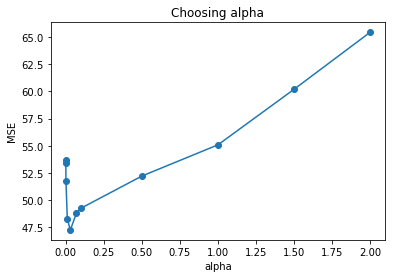

In [45]:
# fit linear regression

alpha = [0.00001, 0.0001,0.001,0.01,0.03, 0.07,0.1,0.5,1, 1.5, 2]
mse = np.zeros((len(alpha),1))
for i in np.arange(len(alpha)):
    lreg = linear_model.Lasso(alpha = alpha[i], max_iter=10000)
    lreg.fit(trainX, trainY)

    pred = lreg.predict(devX)

    mse[i] = np.mean((pred - devY)**2)
print(mse)
plt.figure()
plt.plot(alpha, mse, 'o-')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Choosing alpha')
plt.savefig('choosing_alpha')

In [53]:
# fit linear regression 
lreg = linear_model.Lasso(alpha = 0.5, max_iter=10000)
lreg.fit(trainX, trainY)

pred = lreg.predict(devX)

mse = np.mean((pred - devY)**2)
print(mse)

52.214356636513386


0.521764895496
[ 1.30510595  0.         -0.          0.         -0.          0.          1.2123351
  0.          0.         -0.         -0.          0.          0.          0.
  0.          0.          0.          0.         -0.         -0.          0.
 -0.         -0.         -0.          0.          0.          0.          0.
 -0.          0.         -0.          6.16400966  0.64175173 -0.
  0.66211299  0.         -1.0383233  -0.          0.          0.         -0.
  0.          0.          0.         -0.12930639 -0.         -0.         -0.
  0.         -0.         -0.45145306  0.37194954  0.          0.40092131
  0.          0.41035869  0.         -0.          0.          0.
  1.05053108 -0.         -0.          0.          0.         -0.
 -0.31224925 -0.         -0.         -0.          0.         -0.47820862
 -0.55082413 -0.         -0.          0.          0.          0.         -0.
  0.         -0.03367637 -0.         -0.          0.34443458 -0.         -0.
  0.          0.43746

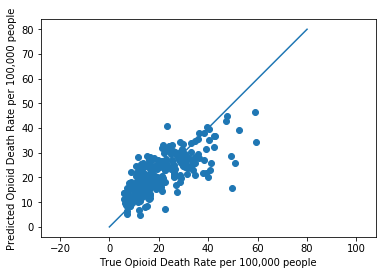

In [54]:
score = lreg.score(devX,devY)
print(score)
h = plt.figure()
plt.scatter(devY.values, pred)
plt.axis('equal')
plt.plot([0, 80], [0, 80])
plt.xlabel('True Opioid Death Rate per 100,000 people')
plt.ylabel('Predicted Opioid Death Rate per 100,000 people')
print(lreg.coef_)

index_array = lreg.coef_ > 0.001

feature_names = features.columns.values

print('Positively correlated')
print(feature_names[index_array])

index_array = lreg.coef_ < -0.001
print('Negatively correlated')
print(feature_names[index_array])
plt.savefig('Lasso_all_data')

In [55]:
year_variable = data['year_keep']
year2016_index = (year_variable == 2016.0).values
print(year2016_index)

print(data.shape)
data_2016 = data[year2016_index]
print(data_2016.shape)


response_2016 = data_2016['Crude Rate']
features_2016 = data_2016.drop('Crude Rate', axis=1, inplace = False)
features_2016 = features_2016.drop('year_keep', axis=1, inplace = False)


features_2016_scale = preprocessing.scale(features_2016)


[False False  True ...,  True False  True]
(2702, 601)
(960, 601)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [ ]:
# Lasso on 2015 to predict 2016 

year2015_index = (year_variable == 2015.0).values
data_2015 = data[year2015_index]
print(data_2015.shape)


response_2015 = data_2015['Crude Rate']
features_2015 = data_2015.drop('Crude Rate', axis=1, inplace = False)
features_2015 = features_2015.drop('year_keep', axis=1, inplace = False)

In [ ]:



alpha = [0.00001, 0.0001,0.001,0.01,0.03, 0.07,0.1,0.5,1, 1.5, 2]
mse = np.zeros((len(alpha),1))
for i in np.arange(len(alpha)):
    lreg = linear_model.Lasso(alpha = alpha[i], max_iter=10000)
    lreg.fit(preprocessing.scale(features_2015), response_2015)

    pred = lreg.predict(features_2016_scale)

    mse[i] = np.mean((pred - response_2016)**2)
    
    

print(mse)

(886, 601)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


131.25913339067864
0.368511412474
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
  -0.00000000e+00   0.00000000e+00   1.00000305e+00   0.00000000e+00
  -0.00000000e+00  -0.00000000e+00   0.00000000e+00   0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -0.00000000e+00   5.42933066e+00
   0.00000000e+00  -1.06756019e-01   4.44477589e-01   0.00000000e+00
  -7.71940879e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00   0.00000000e+00
  -0.00000000e+00   0.00000000e+00   0.00000000e+00   8.60795668e-01


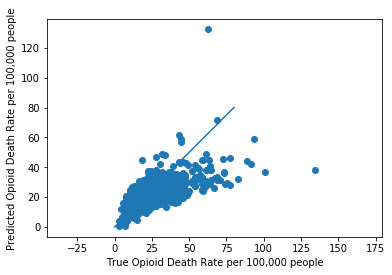

In [52]:
# fit linear regression 
lreg = linear_model.Lasso()
lreg.fit(preprocessing.scale(features_2015), response_2015, max_iter = 10000)

         
pred = lreg.predict(features_2016_scale)

mse = np.mean((pred - response_2016)**2)
print(mse)

score = lreg.score(features_2016_scale,response_2016)
print(score)
h = plt.figure()
plt.scatter(response_2016, pred)
plt.axis('equal')
plt.plot([0, 80], [0, 80])
plt.xlabel('True Opioid Death Rate per 100,000 people')
plt.ylabel('Predicted Opioid Death Rate per 100,000 people')
print(lreg.coef_)

index_array = lreg.coef_ > 0.1

feature_names = features.columns.values

print('Positively correlated')
print(feature_names[index_array])

index_array = lreg.coef_ < -0.1
print('Negatively correlated')
print(feature_names[index_array])
plt.savefig('Lasso_2016_predictions')

In [ ]:
error = (pred - response_2016)**2

plt.figure()
plt.plot(error.values)

data_2016[error > 20]

In [ ]:
county_code = data.index.get_level_values('County Code').values
two_digit_codes = np.round(county_code/1000.0)

error_by_state = np.zeros((56,2))
error_by_state[:,0] = np.arange(56)
for i in np.arange(np.max(two_digit_codes)):
    indices = np.argwhere(two_digit_codes == i)
    print(error[indices])
    average_error = np.median(error[indices])
    if not math.isnan(average_error):
        error_by_state[i,1] = average_error


In [ ]:
two_digit_codes = np.round(county_code/1000.0)
print(two_digit_codes)
two_digit_codes == 1.0